# Analisis estadistico

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (10,8)

## Datos

In [4]:
# Datos precipitacion
precipitacion = pd.read_csv("precipitacion_guerrero.csv", thousands = ",")

In [6]:
# Estadistica descriptiva
precipitacion.describe()

,PERIODO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
count,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2002.500000,6.905556,5.40000,5.094444,5.566667,45.238889,192.758333,198.302778,225.380556,241.441667,110.963889,19.000000,4.958333,1061.024444
std,10.535654,12.490521,19.28182,11.323829,4.477053,31.195387,56.757214,61.910869,84.050107,76.467724,53.671281,22.491725,8.813735,168.236807
min,1985.000000,0.000000,0.00000,0.000000,0.000000,2.600000,68.600000,93.700000,104.900000,131.900000,9.000000,0.600000,0.000000,698.200000
25%,1993.750000,0.300000,0.00000,0.350000,2.000000,20.625000,154.975000,152.400000,167.150000,196.175000,65.950000,4.450000,0.300000,954.325000
50%,2002.500000,1.300000,0.35000,1.200000,4.600000,40.900000,191.000000,183.600000,219.400000,232.850000,124.450000,13.100000,0.900000,1043.490000
75%,2011.250000,6.325000,2.85000,3.500000,8.875000,61.200000,226.650000,241.950000,247.525000,268.150000,142.225000,28.125000,5.350000,1169.125000
max,2020.000000,47.600000,113.90000,52.500000,16.400000,134.100000,334.500000,318.400000,518.200000,535.200000,194.900000,123.100000,46.000000,1521.000000


## Prueba de normalidad

In [7]:
def normal_test(datos, option = "shapiro"):

    if option != "shapiro":
        test = stats.normaltest(datos)
    else:
        test = stats.shapiro(datos)

    if test.pvalue < 0.05 :
        print("Rechazar hipotesis nula")
    else:
        print("No hay evidencia suficiente para rechazar hipotesis nula")
    
    print(test)


In [8]:
normal_test(precipitacion["JUL"], "dagostino")

No hay evidencia suficiente para rechazar hipotesis nula
NormaltestResult(statistic=3.1786195840173925, pvalue=0.2040664114060036)


<AxesSubplot:xlabel='JUL', ylabel='Count'>

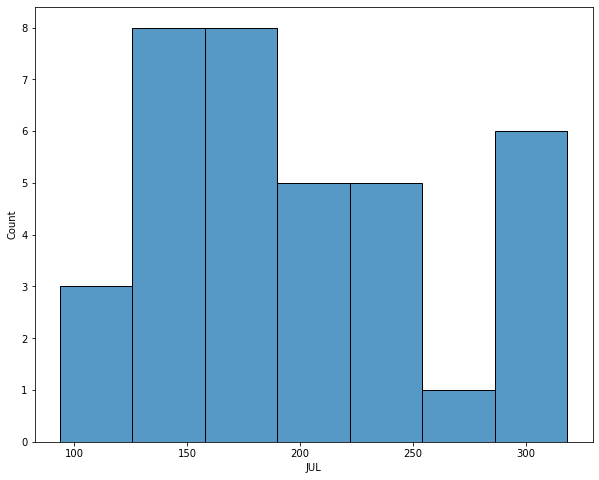

In [9]:
sns.histplot(precipitacion["JUL"])

## Pruebas de hipotesis

### t-test una muestra

In [10]:
def t_test_1samp(datos, media):

    test = stats.ttest_1samp(datos, popmean = media)

    if test.pvalue < 0.05:
        print("Rechazar hipotesis nula")
    else:
        print("No hay evidencia suficiente para rechazar hipotesis nula")
    print(test)

In [11]:
# Probar si la media de precipitacion en julio es de 150

# H_0: La media de precipitacion en julio es 150
# H_1: La media de precipitacion en julio no es igual a 150

t_test_1samp(precipitacion["JUL"], 150)

Rechazar hipotesis nula
Ttest_1sampResult(statistic=4.681192028483727, pvalue=4.186335296904115e-05)


### t-test 2 muestras independientes

In [12]:
def t_test(muestra_a, muestra_b, equal_var):

    t_test = stats.ttest_ind(a = muestra_a, b = muestra_b, equal_var= equal_var)

    if t_test.pvalue < 0.05:
        print("Rechazar hipotesis nula")
    else:
        print("No hay evidencia suficiente para rechazar hipotesis nula")
    print(t_test)

In [13]:
# H_0: La media de precipitacion en enero y julio es igual
# H_1: La media de precipitacion en enero y julio no es igual

t_test(precipitacion["ENE"], precipitacion["JUL"], False)

Rechazar hipotesis nula
Ttest_indResult(statistic=-18.182624091950878, pvalue=2.6916485711230398e-20)


### t-test 2 muestras pareadas

In [15]:
def t_test_dep(muestra_a, muestra_b):

    t_test = stats.ttest_rel(a = muestra_a, b = muestra_b)

    if t_test.pvalue < 0.05:
        print("Rechazar hipotesis nula")
    else:
        print("No hay evidencia suficiente para rechazar hipotesis nula")
    print(t_test)

In [16]:
# Obtenemos los valores de precipitacion en julio, y los dividimos en dos piezas
julio_85_02 = precipitacion.query('PERIODO <= 2002')["JUL"]
julio_03_20 = precipitacion.query('PERIODO >= 2003')["JUL"]

In [17]:
# H0: La diferencia de medias es igual a 0
# H1: La diferencia de medias no es igual a 0

t_test_dep(julio_85_02, julio_03_20)

No hay evidencia suficiente para rechazar hipotesis nula
Ttest_relResult(statistic=-0.5227445039981692, pvalue=0.6078983028127907)


## Test de Levene (Test de homogeneidad de varianzas)

In [18]:
def levene_test(muestra_a, muestra_b, center):

    levene_test = stats.levene(muestra_a, muestra_b, center= center)

    if levene_test.pvalue < 0.05:
        print("Rechazar hipotesis nula")
    else:
        print("No hay evidencia suficiente para rechazar hipotesis nula")
    
    print(levene_test)

In [19]:
# H0: La varianza de precipitacion en julio es igual a la varianza de precipitacion en diciembre
# H1: La varianza de precipitacion en julio no es igual a la varianza de precipitacion en diciembre

levene_test(precipitacion["JUL"], precipitacion["DIC"], "median")

Rechazar hipotesis nula
LeveneResult(statistic=45.79026387425224, pvalue=3.314444965731039e-09)


## Regresion lineal

In [23]:
from statsmodels.formula.api import ols

In [21]:
# Datos edad peso
edad_peso = pd.read_table("edadpesograsas.txt", sep="\t")
edad_peso

,peso,edad,grasas
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451
5,69,25,302
6,63,28,288
7,72,36,385
8,79,57,402
9,75,44,365


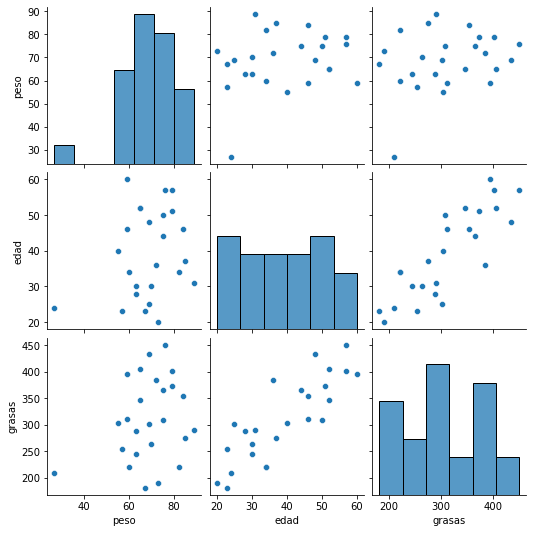

In [27]:
sns.pairplot(edad_peso)

<AxesSubplot:xlabel='edad', ylabel='grasas'>

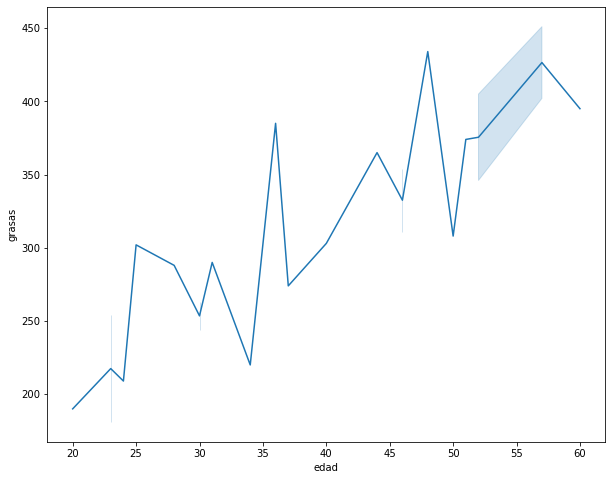

In [30]:
sns.lineplot(data = edad_peso, x = "edad", y = "grasas")

In [24]:
model = ols('grasas ~ edad', edad_peso).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grasas   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     53.96
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.79e-07
Time:                        15:13:20   Log-Likelihood:                -128.73
No. Observations:                  25   AIC:                             261.5
Df Residuals:                      23   BIC:                             263.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.5751     29.638      3.461      0.002      41.265     163.885
edad           5.3207      0.724      7.346      0.000       3.822       6.819
==============================================================================
Omnibus:                        1.067   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                1.031
Skew:                           0.406   Prob(JB):                        0.597
Kurtosis:                       2.426   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""